In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import statistics
pd.set_option('display.max_rows', 100)

In [2]:
online_results = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-06-12 02:16:39.637779+01:00.csv", "rb"))

online_results

{'{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}': [[{'median_absolute_error': 7423.690230130251,
    'mean_squared_error': 280592024.0511837,
    'mean_absolute_error': 12346.327822366233,
    'root_mean_squared_error': 16750.88129177637,
    'training_time': 190.72555885187467,
    'testing_time': 26.801386877486948},
   {'median_absolute_error': 4335.171261485,
    'mean_squared_error': 154961008.3243053,
    'mean_absolute_error': 8215.928845008959,
    'root_mean_squared_error': 12448.333556115263,
    'training_time': 185.485129047418,
    'testing_time': 25.62021027575247},
   {'median_absolute_error': 3117.646986184798,
    'mean_squared_error': 106747284.88505365,
    'mean_absolute_error': 6278.122099922365,
    'root_mean_squared_error': 10331.85776542891,
    'training_time': 178.12034960318124,
    'testing_time': 25.881156817951705},
   {'median_absolute_error': 2664.357328224196,
    'mean_squared_error': 82706848.87095423,
    'mean_abs

In [44]:
results_df = pd.concat({key: pd.DataFrame(value) for key, value in online_results.items()}, axis=0)#.iloc[0,0]


In [77]:
def get_metrics(metric="mean_absolute_error"):
    result_edited = results_df.copy()
    for i in range(len(results_df)):
        for j in range(len(results_df.columns)):
            result_edited.iloc[i,j] = results_df.iloc[i,j][metric]
    result_edited = result_edited.apply(pd.to_numeric, errors='coerce')
    result_edited = result_edited.reset_index().groupby("level_0")[list(range(20))].mean()
    result_edited = result_edited.reset_index().melt(id_vars="level_0")
    result_edited = result_edited.rename(columns={"value":metric})
    return result_edited

# mean_absolute_error_results = get_metrics("mean_absolute_error")
mean_absolute_error_results = get_metrics("mean_absolute_error")
training_time_results = get_metrics("training_time")
testing_time_results = get_metrics("testing_time")

testing_time_results


,level_0,variable,testing_time
0,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.248149
1,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.223994
2,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.782762
3,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.147499
4,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1...",0,23.572594
...,...,...,...
215,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,...",19,7.657064
216,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",19,10.608085
217,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""a...",19,6.650295
218,"{""power"": 0.1}",19,4.878133


In [79]:
all_results = testing_time_results.merge(training_time_results, on=['level_0', 'variable']).merge(mean_absolute_error_results, on=['level_0', 'variable'])
all_results


,level_0,variable,testing_time,training_time,mean_absolute_error
0,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.248149,185.865077,15245.056222
1,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.223994,186.727080,15245.056222
2,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.782762,174.860139,12446.265425
3,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.147499,170.104155,12446.265425
4,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1...",0,23.572594,167.609813,1940.910440
...,...,...,...,...,...
215,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,...",19,7.657064,124.961575,1904.097601
216,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",19,10.608085,137.478386,1904.097601
217,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""a...",19,6.650295,72.458306,1989.046421
218,"{""power"": 0.1}",19,4.878133,38.633419,1172.587521


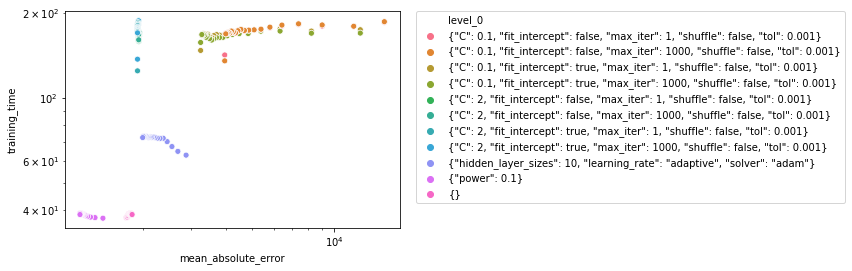

In [83]:
sns.scatterplot(data=all_results, x='mean_absolute_error', y="training_time", hue="level_0")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yscale('log')
plt.xscale('log')

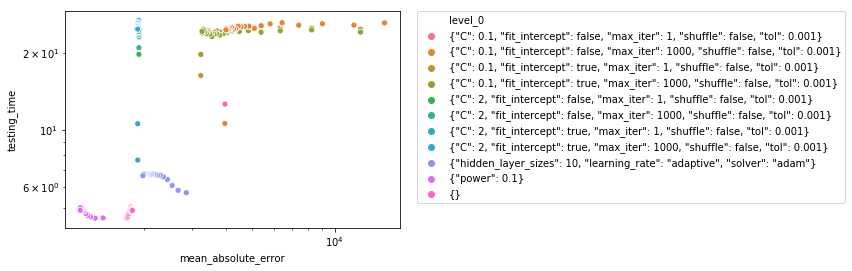

In [84]:
sns.scatterplot(data=all_results, x='mean_absolute_error', y="testing_time", hue="level_0")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yscale('log')
plt.xscale('log')